In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./data/combined_mpd.slice.0-999.csv')
df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,pid,name,modified_at,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0,Throwbacks,1493424000,...,0.006970,0.0471,0.810,125.461,audio_features,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,In The Zone,0,Throwbacks,1493424000,...,0.025000,0.2420,0.924,143.040,audio_features,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,198800,4
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit),0,Throwbacks,1493424000,...,0.000000,0.0598,0.701,99.259,audio_features,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,235933,4
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justified,0,Throwbacks,1493424000,...,0.000234,0.0521,0.817,100.972,audio_features,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,267267,4
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Hot Shot,0,Throwbacks,1493424000,...,0.000000,0.3130,0.654,94.759,audio_features,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4


In [4]:
# Song Occurrence across playlists.
song_occurrence = df.groupby('artist_name')['track_name'].value_counts()
song_occurrence = song_occurrence.reset_index()
overall_df = pd.merge(df, song_occurrence, on=['track_name', 'artist_name'], how='outer')
overall_df = overall_df.rename(columns={'count': 'song_occurrence'})

<Axes: xlabel='song_occurrence', ylabel='track_name'>

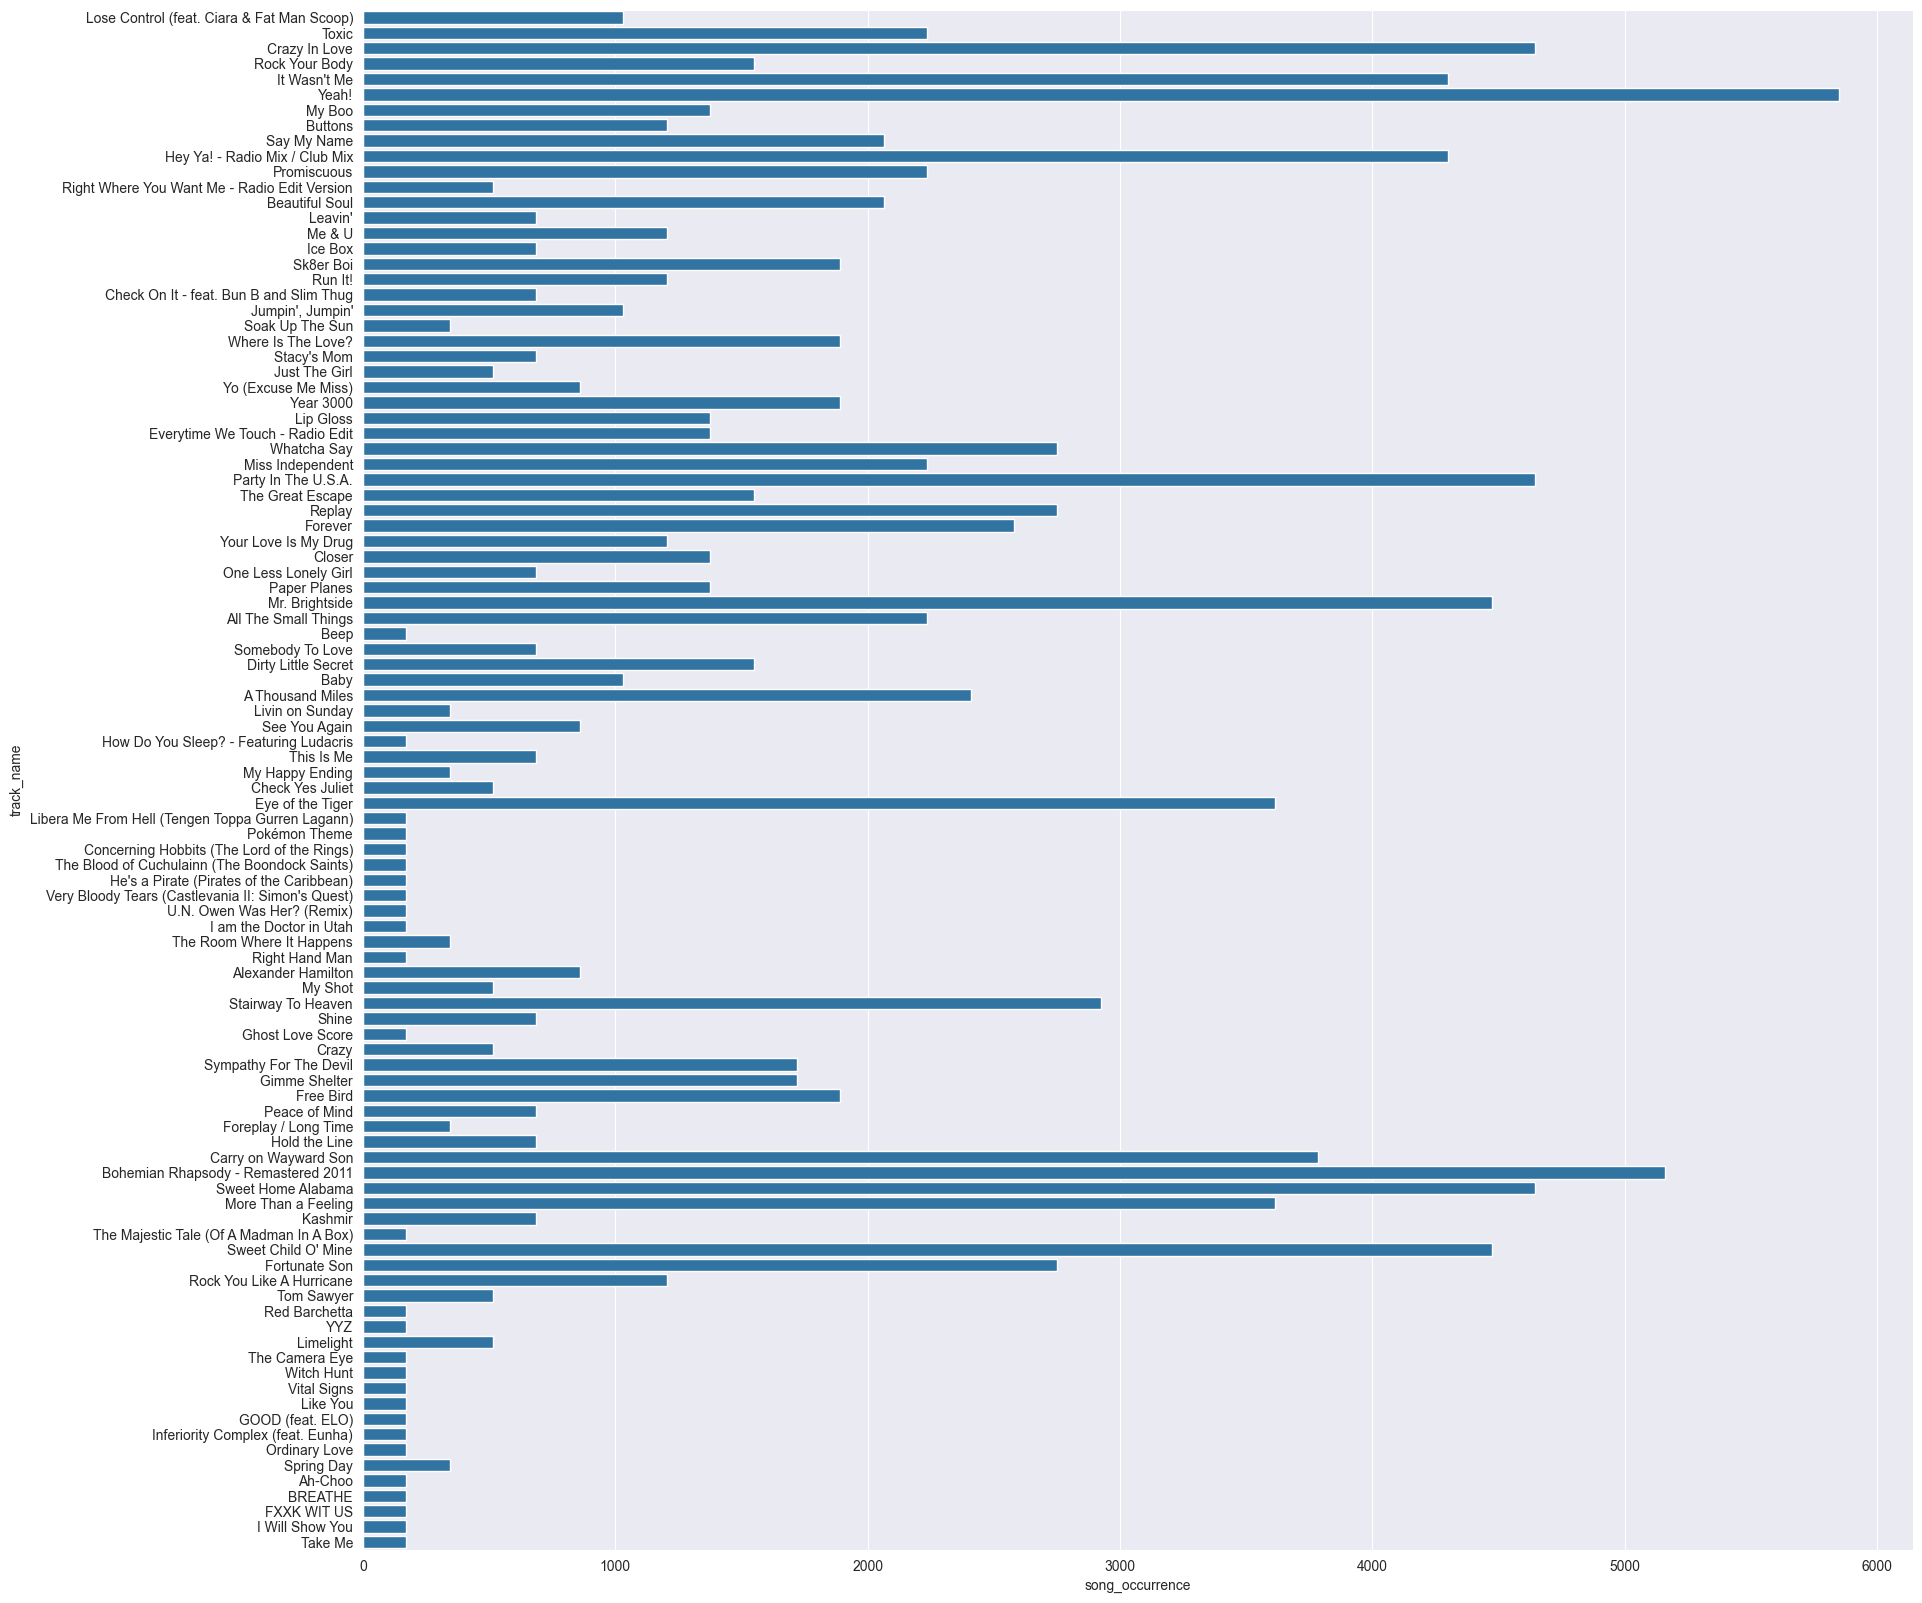

In [10]:
plt.figure(figsize=(20,20))
sns.barplot(overall_df, x='song_occurrence', y='track_name', orient='y')